In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import os

In [23]:
# Get the current working directory
current_dir =os.getcwd()
# Get the current working director
file_path = os.path.join(current_dir, 'data', '2018-0101-2024-05-29_135856_BTCUSDT_15m_klines.csv')
print(file_path)
coin_Name='BTC'

C:\Users\ASUS\Git\Graph-Prediction---Research\data\2018-0101-2024-05-29_135856_BTCUSDT_15m_klines.csv


In [24]:
data = pd.read_csv(file_path)

In [56]:
feature=data[:1300]

In [57]:
feature.head()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,qav,numTrades,tbbav,tbqav,ignore
0,2018-01-01 00:00:00.000,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999,1.675545e+06,1572,63.227133,8.576108e+05,0
1,2018-01-01 00:15:00.000,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999,1.321757e+06,1461,47.686389,6.422812e+05,0
2,2018-01-01 00:30:00.000,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999,1.078825e+06,1000,43.710406,5.900347e+05,0
3,2018-01-01 00:45:00.000,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999,1.917783e+06,1195,73.897993,1.000614e+06,0
4,2018-01-01 01:00:00.000,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999,9.778198e+05,898,34.257652,4.618369e+05,0


In [58]:
df = feature.copy()

df['Time'] = np.arange(len(df.index))

df.head()

,OpenTime,Open,High,Low,Close,Volume,CloseTime,qav,numTrades,tbbav,tbqav,ignore,Time
0,2018-01-01 00:00:00.000,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999,1.675545e+06,1572,63.227133,8.576108e+05,0,0
1,2018-01-01 00:15:00.000,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999,1.321757e+06,1461,47.686389,6.422812e+05,0,1
2,2018-01-01 00:30:00.000,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999,1.078825e+06,1000,43.710406,5.900347e+05,0,2
3,2018-01-01 00:45:00.000,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999,1.917783e+06,1195,73.897993,1.000614e+06,0,3
4,2018-01-01 01:00:00.000,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999,9.778198e+05,898,34.257652,4.618369e+05,0,4


E:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
E:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
E:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


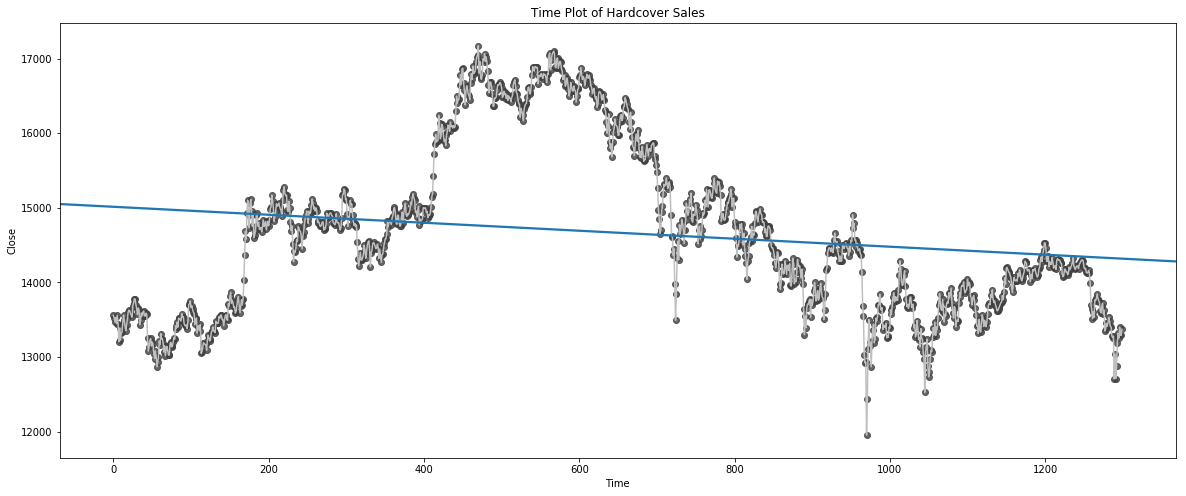

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot('Time', 'Close', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Close', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [64]:
#Trend
store_sales = df.set_index('OpenTime').to_period('D')

average_sales = store_sales.groupby('OpenTime').mean()['Close']

TypeError: unsupported Type Index